In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

In [2]:
covid_19_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [3]:
covid_19_cases = covid_19_cases.T

In [4]:
covid_19_cases
new_header = covid_19_cases.iloc[0]

In [5]:
for i, cell in enumerate(covid_19_cases.iloc[0]):
    covid_19_cases.iloc[0][i] = str(str(covid_19_cases.iloc[0][i]) + ", ").replace("nan, ", "") + str(covid_19_cases.iloc[1][i])

In [6]:
covid_19_cases.iloc[0][0]

'Thailand'

In [7]:
covid_19_cases.columns = new_header
covid_19_cases = covid_19_cases.drop(['Country/Region','Lat','Long', 'Province/State'])

In [8]:
covid_19_cases.rename(columns={'Province/State': 'Date'}, inplace=True)

In [9]:
covid_19_cases.index = pd.to_datetime(covid_19_cases.index)

In [10]:
covid_19_cases

Province/State,Thailand,Japan,Singapore,Nepal,Malaysia,"British Columbia, Canada","New South Wales, Australia","Victoria, Australia","Queensland, Australia",Cambodia,...,"Davison, SD, US","Minnehaha, SD, US","Bon Homme, SD, US","Socorro, NM, US","Bernalillo, NM, US","Oakland, MI, US","Wayne, MI, US","New Castle, DE, US",Cuba,Guyana
2020-01-22,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,5,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,7,2,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,8,4,4,1,4,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,8,4,5,1,4,0,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,14,7,7,1,4,1,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,14,7,7,1,7,1,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,14,11,10,1,8,1,4,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,19,15,13,1,8,1,4,3,2,1,...,0,0,0,0,0,0,0,0,0,0


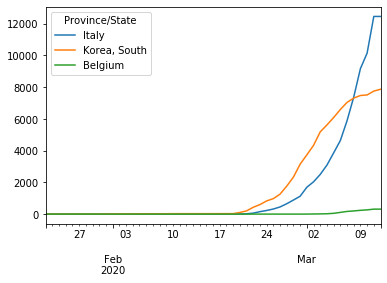

In [11]:
covid_19_cases[["Italy", "Korea, South", "Belgium"]].plot()

In [12]:
china = [column for column in covid_19_cases.columns if 'China' in column]

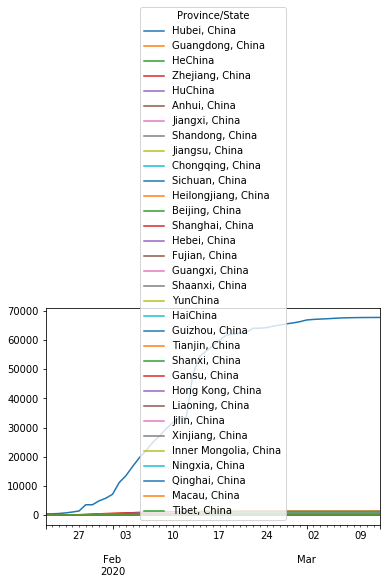

In [13]:
covid_19_cases[china].plot()

In [14]:
hubei = covid_19_cases["Hubei, Mainland China"]

KeyError: 'Hubei, Mainland China'

In [ ]:
hubei = np.array(hubei)[0:20].astype(float)

In [ ]:
hubei
x = np.arange(0, len(hubei)).astype(float)

In [ ]:
plt.plot(x, hubei)

In [ ]:
np.polyfit(x, hubei, 2)
p2 = np.poly1d(np.polyfit(x, hubei, 2))
p2

In [ ]:
plt.plot(x, hubei, '.', x, p2(x), '-')

In [ ]:
import scipy.stats as stats

In [ ]:
r, p = stats.pearsonr(hubei, p2(x))
r

In [ ]:
italy = covid_19_cases["Italy"]

In [ ]:
italy = np.array(italy)[29:].astype(float)

In [ ]:
italy

In [ ]:
x = np.arange(0, len(italy)).astype(float)

In [ ]:
plt.plot(x, italy)

In [ ]:
np.polyfit(x, italy, 2)
p2 = np.poly1d(np.polyfit(x, italy, 2))
p2

In [ ]:
plt.plot(x, italy)
plt.yscale('log')

In [ ]:
r, p = stats.pearsonr(italy, p2(x))
r